In [32]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
%matplotlib inline
import seaborn as sns
sns.set(font_scale=1.4)
import plotly.express as px
from uszipcode import Zipcode, SearchEngine
search = SearchEngine(simple_zipcode=True)

In [2]:
import plotly.express as px
import geopandas as gpd
import plotly.graph_objects as go

In [3]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from statsmodels.api import OLS, add_constant
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, \
                                accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [4]:
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.metrics import mean_squared_error as mse

In [5]:
my_colors = ['royalblue','seagreen', 'salmon','y','blueviolet','orangered' ,
                 'olive','deeppink', 'purple', 'gold', 'cyan' ]

# Project (AirBnB listings in major US cities)

<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Description" data-toc-modified-id="Project-Description-1">Project Description</a></span></li><li><span><a href="#Explore-The-Dataset" data-toc-modified-id="Explore-The-Dataset-2">Explore The Dataset</a></span></li><li><span><a href="#Data-Cleaning" data-toc-modified-id="Data-Cleaning-3">Data Cleaning</a></span><ul class="toc-item"><li><span><a href="#Missing-Values" data-toc-modified-id="Missing-Values"><span class="toc-item-num">&nbsp;&nbsp;</span>Missing Values</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers"><span class="toc-item-num">&nbsp;&nbsp;</span>Outliers</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-4">Data Preprocessing</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-5">Feature Selection</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-6">Modeling</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression"><span class="toc-item-num">&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#RidgeCV" data-toc-modified-id="RidgeCV"><span class="toc-item-num">&nbsp;&nbsp;</span>RidgeCV</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree"><span class="toc-item-num">&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#Random-Forest" data-toc-modified-id="Random-Forest"><span class="toc-item-num">&nbsp;&nbsp;</span>Random Forest</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA"><span class="toc-item-num">&nbsp;&nbsp;</span>PCA</a></span></li></ul></li><li><span><a href="#Evaluate-model" data-toc-modified-id="Evaluate-model-7">Evaluate model</a></span></li></ul></div>

## Project Description

The aim of this competition was to predict the price of AirBnB listings in major U.S. cities.

- Instructions

    - Build a model with the training data (train.csv) that predicts the variable "log_price"

    - Then we needed to run the model on the test dataset (test.csv) to generate predictions in the format found in the sample submission (sample_submission.csv)

- Data 

*The training data for the project consist of the following columns:*

    - id : Record identifier
    - log_price : log(price) [The logarithm used is natural log]
    - ….. : 27 features for the listing

*There are 2 files provided for this competition:*

    - train.csv . : Training data
    - test.csv . : Test data


In [6]:
airbnb_origin = pd.read_csv('data/train.csv')

In [7]:
test_df = pd.read_csv('data/test.csv')

## Explore The Dataset

In [9]:
airbnb = airbnb_origin.copy()
airbnb.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [182]:
airbnb.columns

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')

In [10]:
airbnb.shape

(74111, 29)

In [183]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [184]:
airbnb.describe().round().T

,count,mean,std,min,25%,50%,75%,max
id,74111.0,11266617.0,6081735.0,344.0,6261964.0,12254147.0,16402260.0,21230903.0
log_price,74111.0,5.0,1.0,0.0,4.0,5.0,5.0,8.0
accommodates,74111.0,3.0,2.0,1.0,2.0,2.0,4.0,16.0
bathrooms,73911.0,1.0,1.0,0.0,1.0,1.0,1.0,8.0
latitude,74111.0,38.0,3.0,33.0,34.0,41.0,41.0,42.0
longitude,74111.0,-92.0,22.0,-123.0,-118.0,-77.0,-74.0,-71.0
number_of_reviews,74111.0,21.0,38.0,0.0,1.0,6.0,23.0,605.0
review_scores_rating,57389.0,94.0,8.0,20.0,92.0,96.0,100.0,100.0
bedrooms,74020.0,1.0,1.0,0.0,1.0,1.0,1.0,10.0
beds,73980.0,2.0,1.0,0.0,1.0,1.0,2.0,18.0


In [10]:
price_styled = (np.exp(airbnb.log_price).describe().round().T)
price_styled
#dfi.export(price_styled.style.background_gradient(),"img/prices_stat.png")

count    74111.0
mean       160.0
std        169.0
min          1.0
25%         75.0
50%        111.0
75%        185.0
max       1999.0
Name: log_price, dtype: float64

In [185]:
for col in airbnb.select_dtypes(include='number').columns:
    print(col)
    

id
log_price
accommodates
bathrooms
latitude
longitude
number_of_reviews
review_scores_rating
bedrooms
beds


#### Correlation matrix for numeric columns

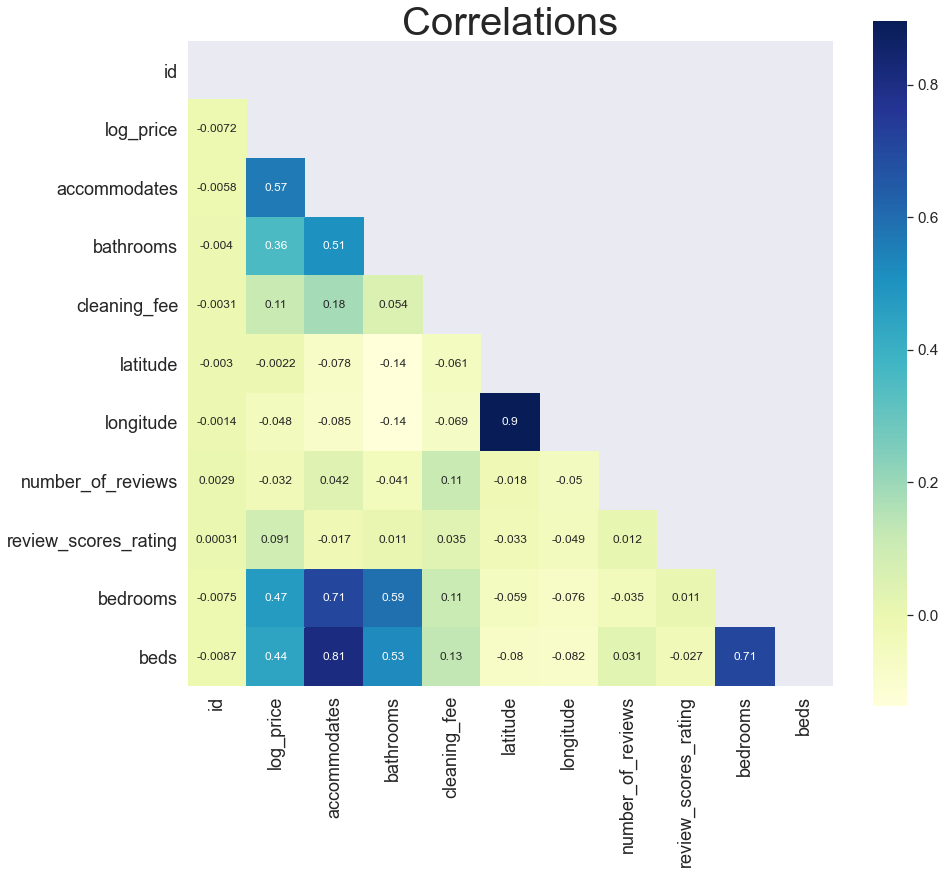

In [33]:
fig = plt.figure(figsize=(16,14))

corr = airbnb.corr() # Compute the correlation matrix

mask = np.triu(np.ones_like(corr, dtype=bool)) # Generate a mask for the upper triangle
ax = sns.heatmap(corr, mask=mask, cmap='YlGnBu', annot=True, square=True, annot_kws={"size": 12})
ax.set_xticklabels(ax.get_xmajorticklabels(), fontsize = 18)
ax.set_yticklabels(ax.get_ymajorticklabels(), fontsize = 18)
plt.title('Correlations', fontsize = 40)
plt.subplots_adjust(left=0.2, bottom=0.2)
fig.savefig('img/correlations.png',  transparent=True, api=100)

#### Distribution of prices

*The log_prices are normally distributed*

Mean app log_price = 4.78
Median app log_price = 4.71


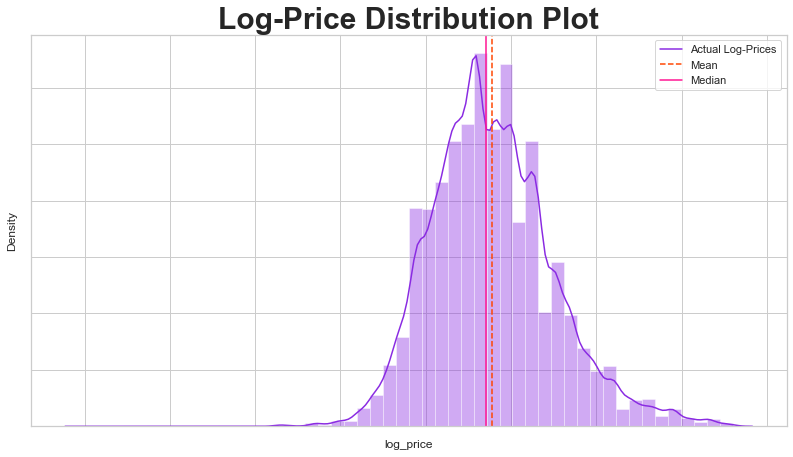

In [216]:
# Average and median rating of apps
mean = round(airbnb['log_price'].mean(), 2)
median = round(airbnb['log_price'].median(), 2)

print(f'Mean app log_price = {mean}', f'Median app log_price = {median}',sep= '\n')

fig = plt.figure(figsize=(16,14))
# Distribution of apps according to their ratings
sns.set_theme()
sns.set_style("whitegrid")
price_hist = sns.distplot(airbnb["log_price"], kde = True,  color=my_colors[4])


price_hist.axvline(mean, color=my_colors[5], linestyle='--')
price_hist.axvline(median, color=my_colors[7], linestyle='-')
plt.legend({'Actual Log-Prices': price_hist, 'Mean':mean,'Median':median})
plt.gcf().set_size_inches( 15, 8)
plt.title("Log-Price Distribution Plot",size=30, weight='bold')
price_hist.set_xticklabels(price_hist.get_xmajorticklabels(), fontsize = 16)
price_hist.set_yticklabels(price_hist.get_ymajorticklabels(), fontsize = 16)
plt.subplots_adjust(left=0.2, bottom=0.2)

#ax = plt.axes()
#ax.set_facecolor('white')

#fig.savefig('img/price_distribution_2.png',  transparent=True, api=100)
fig.savefig('img/price_distribution_2.png')

#### The most expencive neighbourhoods

In [118]:
expencive_neighbours = airbnb.groupby('neighbourhood')['log_price'].mean().reset_index()
neighbour_df = expencive_neighbours.sort_values(by = 'log_price', ascending = False).head(10)
neighbour_df['city'] = airbnb.city

In [24]:
neighbour_df

,neighbourhood,log_price,city
607,Wilmington,7.170120,SF
104,"Chevy Chase, MD",7.130899,LA
411,Observatory Circle,6.715383,LA
480,Sea Cliff,6.259786,NYC
354,Mill Basin,6.214608,LA
186,Emerson Hill,6.138033,NYC
492,Skyland,5.959195,NYC
328,Malibu,5.926612,SF
47,Bellevue,5.905828,NYC
422,Palos Verdes,5.795321,NYC


<Figure size 1296x576 with 0 Axes>

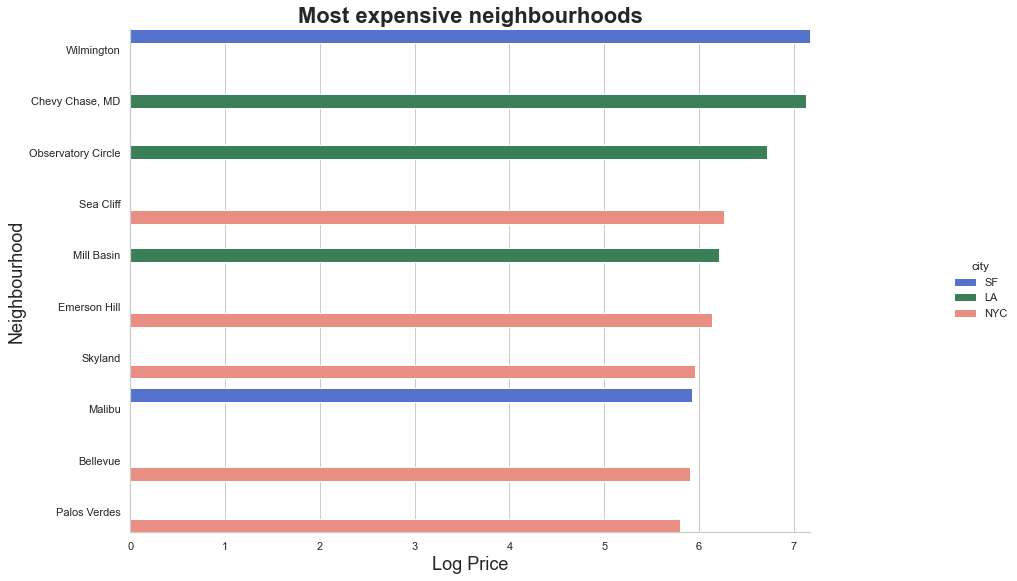

In [208]:
fig = plt.figure(figsize=(18,8))
sns.set_theme()
sns.set_style("whitegrid")


ax3 = sns.catplot(x = 'log_price' , y = 'neighbourhood' ,  kind='bar', data = neighbour_df, hue='city',palette=my_colors )
plt.title("Most expensive neighbourhoods",size=22, weight='bold', y=1.7)
# Set label for x-axis
plt.xlabel( "Log Price" , size = 18 )
# Set label for y-axis
plt.ylabel( "Neighbourhood" , size = 18 )

ax3.fig.set_figwidth(18)
ax3.fig.set_figheight(8)

#plt.subplots_adjust(left=0.2, bottom=0.2)
plt.margins(0,0)

ax3.fig.savefig('img/expensive_neighbours.png',pad_inches = 0, bbox_inches='tight')



#### Number of Listings per City

In [40]:
airbnb['city'].value_counts()

NYC        32349
LA         22453
SF          6434
DC          5688
Chicago     3719
Boston      3468
Name: city, dtype: int64

In [92]:
airbnb['city'].value_counts().index

Index(['NYC', 'LA', 'SF', 'DC', 'Chicago', 'Boston'], dtype='object')

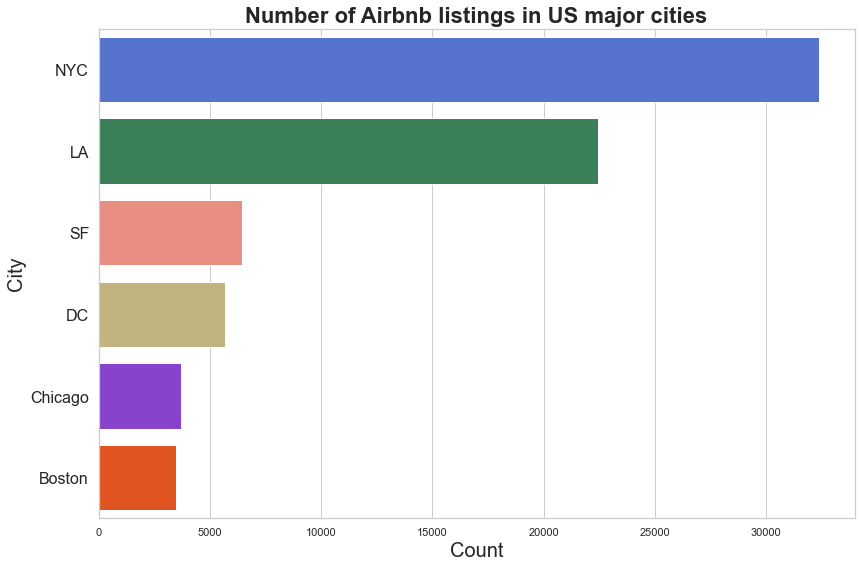

In [217]:
fig = plt.figure(figsize=(15,10))
sns.set_theme()
sns.set_style("whitegrid")
sns.color_palette("bright")

ax1 = sns.countplot( y = 'city' , data = airbnb,
                        order=airbnb['city'].value_counts().index, palette=my_colors )

#ax1.set(xlabel='Count', ylabel='City')
ax1.set_xlabel("Count",fontsize=20)
ax1.set_ylabel("City",fontsize=20)

plt.title("Number of Airbnb listings in US major cities",size=22, weight='bold')
#ax1.set_xticklabels(ax1.get_xmajorticklabels(), fontsize = 12)
ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize = 16)
plt.subplots_adjust(left=0.2, bottom=0.2)

fig.savefig('img/city_2.png')

#### Accommodates vs price

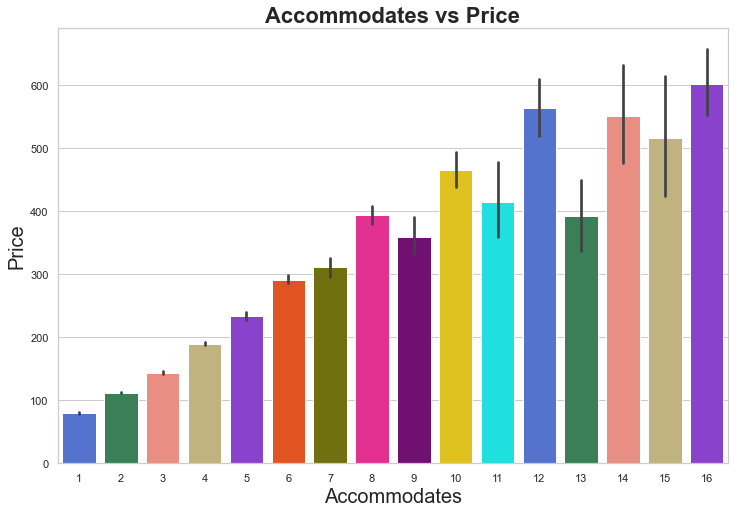

In [214]:
fig = plt.figure(figsize=(12,8))
sns.set_theme()
sns.set_style("whitegrid")
sns.color_palette("bright")

ax1 = sns.barplot( x = 'accommodates', y = np.exp(airbnb.log_price).round() , data = airbnb,
                                                             palette=my_colors )

ax1.set_title('Accommodates vs Price')
plt.title("Accommodates vs Price",size=22, weight='bold')

#ax1.set(xlabel='Accommodates', ylabel='Price')
ax1.set_xlabel("Accommodates",fontsize=20)
ax1.set_ylabel("Price",fontsize=20)

#ax1.set_xticklabels(ax1.get_xmajorticklabels(), fontsize = 18)
#ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize = 18)

fig.savefig('img/Accommodates_2.png')

In [ ]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=airbnb.longitude,y=airbnb.latitude,hue=airbnb.neighbourhood_group)

### Observations

<ul> 
    <li>Data contains : 74111 rows, 29 columns</li> 
    <li>Numerics : float64(7), int64(3) columns</li>
    <li>Categorical : object(18) columns</li>
    <li>price statistics:
        <ul>
         <li>count    58292.0</li> 
         <li>mean       148.0</li> 
         <li>std        135.0</li> 
         <li>min          1.0</li> 
         <li>25%         74.0</li> 
         <li>50%        110.0</li> 
         <li>75%        175.0</li> 
         <li>max       1999.0</li> 
        </ul>
    </li>
    <li>log-prices are normaly distributed</li> 
    <li>correlation between accomodation, beds and bedrooms</li> 
</ul>

## Data Cleaning

### Missing Values

In [218]:
missing_cols = airbnb.isnull().sum(axis=0).reset_index()
missing_cols.columns = ['column_name', 'missing_count']
missing_cols = missing_cols.loc[missing_cols['missing_count']>0]
missing_cols = missing_cols.sort_values(by='missing_count',ascending=False)

<b> for column "host_response_rate" we have 18299 missing data, so we replace them by zero. and the same for test data. then we change the format to numeric</b> 

In [188]:
airbnb.host_response_rate.unique()

array([nan, '100%', '71%', '68%', '67%', '83%', '50%', '90%', '86%',
       '92%', '82%', '80%', '89%', '93%', '99%', '0%', '88%', '96%',
       '70%', '94%', '91%', '25%', '95%', '98%', '62%', '29%', '33%',
       '81%', '63%', '38%', '60%', '79%', '78%', '75%', '65%', '97%',
       '87%', '40%', '54%', '53%', '58%', '76%', '30%', '64%', '17%',
       '20%', '77%', '73%', '41%', '59%', '57%', '85%', '56%', '42%',
       '44%', '35%', '14%', '74%', '27%', '10%', '84%', '6%', '72%',
       '36%', '55%', '43%', '13%', '39%', '46%', '26%', '61%', '52%',
       '23%', '22%', '69%', '66%', '15%', '11%', '31%', '21%', '47%'],
      dtype=object)

In [219]:
airbnb[['host_response_rate']] = airbnb['host_response_rate'].apply(lambda col: float(str(col).replace("%", "")))
airbnb['host_response_rate'] = airbnb['host_response_rate'].fillna(0)
airbnb['host_response_rate'] = pd.to_numeric(airbnb['host_response_rate'])

In [27]:
airbnb.host_response_rate.isna().sum()

0

In [220]:
airbnb.review_scores_rating.unique() #replace nan with zero
airbnb['review_scores_rating'] = airbnb['review_scores_rating'].fillna(0)

In [221]:
airbnb[['first_review', 'host_response_rate',
        'last_review', 'latitude', 'number_of_reviews',
       'review_scores_rating', 'zipcode', 'bedrooms', 'beds']][airbnb.first_review.isna()]

,first_review,host_response_rate,last_review,latitude,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds
3,NaN,0.0,NaN,37.772004,0,0.0,94117.0,2.0,2.0
12,NaN,0.0,NaN,33.813228,0,0.0,90277,1.0,1.0
15,NaN,100.0,NaN,41.908240,0,0.0,60622,1.0,1.0
24,NaN,0.0,NaN,38.911275,0,0.0,20009,1.0,2.0
31,NaN,83.0,NaN,34.064077,0,0.0,90036,1.0,1.0
...,...,...,...,...,...,...,...,...,...
74083,NaN,0.0,NaN,37.801916,0,0.0,NaN,1.0,1.0
74089,NaN,0.0,NaN,34.185699,0,0.0,91001,1.0,1.0
74095,NaN,0.0,NaN,40.617641,0,0.0,11209,1.0,1.0
74106,NaN,0.0,NaN,40.709025,0,0.0,11206.0,1.0,1.0


#### replace Nan with 0

In [222]:
# 'last_review'
airbnb['last_review'] = airbnb['last_review'].fillna('00-00-00')
# 'first_review'
airbnb['first_review'] = airbnb['first_review'].fillna('00-00-00')
# 'host_since'
airbnb['host_since'] = airbnb['host_since'].fillna('00-00-00')

In [223]:
# 'bathrooms'
airbnb['bathrooms'] = airbnb['bathrooms'].fillna(0)
# 'bedrooms'
airbnb['bedrooms'] = airbnb['bedrooms'].fillna(0)
# 'beds' 
airbnb['beds'] = airbnb['beds'].fillna(0)

In [224]:
# 'neighbourhood'
airbnb.neighbourhood.fillna('Unknown',inplace=True)
# 'thumbnai_url'
airbnb.thumbnail_url.fillna('Unknown',inplace=True)

#### change host_has_profile_pic and host_identity_verified to boolean(0,1)

In [225]:
airbnb.host_has_profile_pic.unique()
# 'host_has_profile_pic'
airbnb.loc[airbnb.host_has_profile_pic == 't', 'host_has_profile_pic'] = 1
airbnb.loc[airbnb.host_has_profile_pic == 'f', 'host_has_profile_pic'] = 0
airbnb['host_has_profile_pic'] = airbnb['host_has_profile_pic'].fillna(0)

In [226]:
# 'host_identity_verified'
airbnb.loc[airbnb.host_identity_verified == 't', 'host_identity_verified'] = 1
airbnb.loc[airbnb.host_identity_verified == 'f', 'host_identity_verified'] = 0
airbnb['host_identity_verified'] = airbnb['host_identity_verified'].fillna(0)

<b> We must clean zipcode column and then we can find some missing zipcodes by looking at longitude/latitude columns </b>

In [227]:
# 'zipcode'
airbnb.zipcode.fillna('Unknown',inplace=True)
airbnb.loc[airbnb.zipcode == ' ', 'zipcode'] = 0
idx = airbnb.index[airbnb['zipcode']==0].tolist()
for i in idx:
    lat = airbnb['latitude'][i]
    lon = airbnb['longitude'][i]
    result = np.max(search.by_coordinates(lat, lon, radius=30, returns=5))
    airbnb['zipcode'][i]=result.values()[0]    

In [197]:
airbnb.isna().sum().sum() #verify missing values

0

In [198]:
airbnb.duplicated().sum() #no duplicated rows

0

#### Create distance column from latitude/longitude

<b>I defined a new column that will replace latitude/longitude, this column represent the distance of airbnb from the city center </b>
I will apply the Haversine formula as it determines the great-circle distance between two points on a sphere given their longitudes and latitudes. I went using the "km" instead of miles as it gives me larger numbers and thus hopefully more precision.

In [228]:
airbnb.city.unique()
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 


lat_dict ={'NYC' : 40.780751, 'SF' : 37.784827, 'DC' : 38.89872, 'LA': 33.786594, 'Chicago':41.811929, 'Boston':42.354318} 
log_dict ={'NYC' : -73.977182, 'SF' : -122.727802, 'DC' : -77.036198, 'LA': -118.298662, 'Chicago':-87.68732, 'Boston':-71.073449} 
airbnb['lat_citycenter'] = airbnb['city'].apply(set_value, args =(lat_dict, )) 

In [229]:
airbnb['long_citycenter'] = airbnb['city'].apply(set_value, args =(log_dict, )) 

In [230]:
from math import radians, cos, sin, asin, sqrt


def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 3956 Radius of earth in miles.
    distance = c * r
    return distance

airbnb['dist_to_citycenter'] = airbnb.apply(lambda row: haversine(row['longitude'], row['latitude'], row['long_citycenter'], row['lat_citycenter']), axis=1)
airbnb['dist_to_citycenter'] 

0         9.444287
1         1.909319
2         4.143985
3        26.069641
4         2.995124
           ...    
74106     8.587044
74107    13.044763
74108     8.735462
74109     5.077447
74110    10.221951
Name: dist_to_citycenter, Length: 74111, dtype: float64

In [271]:
airbnb.select_dtypes(include='number').columns #all numerical columns

Index(['id', 'log_price', 'accommodates', 'bathrooms', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds',
       'lat_citycenter', 'long_citycenter', 'dist_to_citycenter'],
      dtype='object')

### Outliers

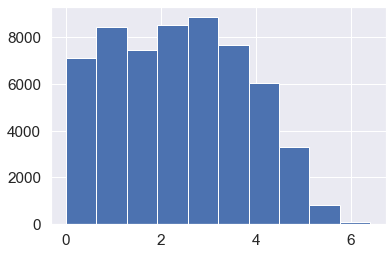

In [99]:
np.log(airbnb.number_of_reviews).hist()

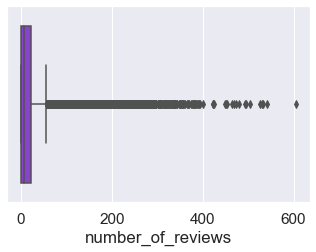

In [69]:
fig = plt.figure(figsize=(6,4))
sns.boxplot(x=airbnb.number_of_reviews, color=my_colors[4])
plt.subplots_adjust(left=0.2, bottom=0.2)
fig.savefig('img/reviews.png',  transparent=True, api=100)

In [231]:
((airbnb.review_scores_rating==0) & (airbnb.number_of_reviews==0) & (airbnb.host_response_rate==0)).sum()
airbnb = airbnb.drop(airbnb[(airbnb.review_scores_rating==0) & (airbnb.number_of_reviews==0) & (airbnb.host_response_rate==0)].index)


In [232]:
((airbnb.review_scores_rating==0) & (airbnb.number_of_reviews==0)).sum()
airbnb = airbnb.drop(airbnb[(airbnb.review_scores_rating==0) & (airbnb.number_of_reviews==0)].index)


In [233]:
(airbnb.review_scores_rating == 0).sum()/airbnb.review_scores_rating.shape[0]

0.015490976463322583

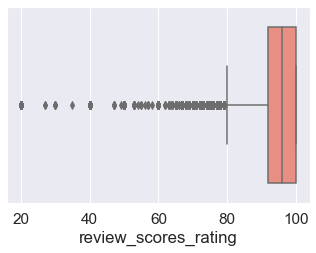

In [70]:

fig = plt.figure(figsize=(6,4))
sns.boxplot(x=airbnb.review_scores_rating, color=my_colors[2])
plt.subplots_adjust(left=0.2, bottom=0.2)
fig.savefig('img/scores.png',  transparent=True, api=100)

### Drop unneceassry columns

In [234]:
airbnb.drop(['id', 'name', 'beds','description', 'thumbnail_url', 'latitude','longitude','zipcode'], axis = 1, inplace=True)

In [235]:
airbnb.drop(['lat_citycenter', 'long_citycenter'], axis = 1, inplace=True)

In [236]:
airbnb.drop(['first_review', 'last_review'], axis = 1, inplace=True)

In [112]:
airbnb.neighbourhood.value_counts()#more than 6000 unknown

Unknown               5105
Williamsburg          2256
Bedford-Stuyvesant    1790
Bushwick              1237
Mid-Wilshire          1106
                      ... 
Skyland                  1
Arleta                   1
Irwindale                1
Edison Park              1
Oakwood                  1
Name: neighbourhood, Length: 599, dtype: int64

## Data-Preprocessing

In [237]:
airbnb.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'bedrooms', 'dist_to_citycenter'],
      dtype='object')

### Categorical Data

Next, we look at all categorical attributes. The categorical variables are varied in type, as we see below. There are texts, date types, booleans, urls, arrays, and currencies. However, all of these are typed as String types. To handle cleaning of categorical attributes, we will look at them individually.

In [238]:
# instant_bookable types are replaced with 0 or 1
airbnb.loc[airbnb.instant_bookable == 't', 'instant_bookable'] = 1
airbnb.loc[airbnb.instant_bookable == 'f', 'instant_bookable'] = 0

In [239]:
categorical_attributes = [ 'neighbourhood','city', 'property_type', 'room_type', 
                          'bed_type','accommodates', 'cancellation_policy']


In [240]:
# Date types are factorized into numerical ints
airbnb['host_since_rank'] = airbnb['host_since'].rank(method='dense').astype(int)

In [241]:
airbnb.drop(['host_since'], axis = 1, inplace=True)

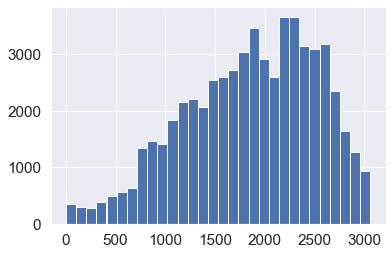

In [118]:
airbnb['host_since_rank'].hist(bins=30)

#### Create amenities_frequency(of words) from amenities column 

In [237]:
airbnb['amenities'].shape

(58292,)

In [242]:
# Arrays are a little complicated. First, we remove the extraneous characters in them
def get_arr(l):
    l = l.replace('[', '');
    l = l.replace(']', '');
    l = l.replace('{', '');
    l = l.replace('}', '');
    l = l.replace("'", '');
    l = l.replace('"', '');
    return l;
airbnb['amenities_words'] = airbnb['amenities'].map(lambda x: get_arr(x))


In [243]:
amentie_counts = dict()
array = airbnb['amenities_words']
for arr in array:
    for w in arr.split(','):
        if w.strip() not in amentie_counts.keys():
            amentie_counts[w.strip()] = 0
        amentie_counts[w.strip()] += arr.count(w.strip())
        


In [244]:
def getFrequency(text):
    frec = 0
    for w in text.split(','):
        frec+=text.count(w.strip())/amentie_counts[w.strip()]
    return frec

        
airbnb['amenities_frequency'] = airbnb['amenities_words'].map(lambda x: getFrequency(x))


In [245]:
airbnb.drop(['amenities_words'],axis=1,inplace=True)

In [246]:
airbnb.drop(['amenities'], axis = 1, inplace=True)

#### Change columns to numeric

In [247]:
airbnb.cleaning_fee = airbnb.cleaning_fee.astype(int)

In [248]:
airbnb.instant_bookable = airbnb.instant_bookable.astype(int)

<b>  neighbourhood contains so many types so I decided to keep only the top 5 values of the column and re-label other columns with `OTHER_neighbour`.</b>

In [249]:
# Dividing the dataset into the top5 and the rest
neighbour_keep = airbnb.neighbourhood.value_counts()[:10].index.to_list()
neighbour_remove = airbnb.neighbourhood.value_counts()[10:].index.to_list()

#Set as 'Other' every country out of the top10 using np.where
airbnb.neighbourhood = np.where(airbnb.neighbourhood.isin(neighbour_remove),'OTHER_neighbour',airbnb.neighbourhood)

In [250]:
from category_encoders import TargetEncoder
encoder = TargetEncoder()
airbnb['neighbourhood_encoder'] = encoder.fit_transform(airbnb['neighbourhood'],airbnb['log_price'])


<b>  property_type contains so many types so I decided to keep only the top 5 values of the column and re-label other columns with `OTHER_prop_type`.</b>

In [251]:
# Dividing the dataset into the top5 and the rest
proptype_keep = airbnb.property_type.value_counts()[:5].index.to_list()
proptypey_remove = airbnb.property_type.value_counts()[5:].index.to_list()

#Set as 'Other' every country out of the top10 using np.where
airbnb.property_type = np.where(airbnb.property_type.isin(proptypey_remove),'OTHER_prop_type',airbnb.property_type)

<b>Too many neighbourhoods in the column so I remove this column</b>

In [293]:
airbnb.groupby(['city','neighbourhood']).log_price.mean()

city     neighbourhood     
Boston   OTHER_neighbour       4.884362
Chicago  OTHER_neighbour       4.619909
         Unknown               4.611191
DC       OTHER_neighbour       4.849754
         Unknown               4.748467
LA       Mid-Wilshire          4.671059
         OTHER_neighbour       4.769731
         Unknown               4.561759
NYC      Bedford-Stuyvesant    4.437105
         Bushwick              4.279518
         OTHER_neighbour       4.759231
         Unknown               4.391542
         Williamsburg          4.750443
SF       OTHER_neighbour       5.125863
         Unknown               4.764140
Name: log_price, dtype: float64

In [252]:
airbnb.drop(['neighbourhood'], axis = 1, inplace=True)

### lets get_dummies for all categorical column

In [253]:
airbnb.loc[airbnb.instant_bookable == 't', 'instant_bookable'] = 1
airbnb.loc[airbnb.instant_bookable == 'f', 'instant_bookable'] = 0

In [347]:
airbnb.select_dtypes(include=object).columns #all categorical columns

Index(['property_type', 'room_type', 'bed_type', 'cancellation_policy',
       'city'],
      dtype='object')

In [208]:
airbnb.accommodates.value_counts()

2     28002
4     10871
1      7390
3      7025
6      4514
5      3130
8      1669
7       891
10      660
16      294
9       256
12      249
14      102
11       74
15       54
13       33
Name: accommodates, dtype: int64

In [254]:
categorical_attributes = ['property_type', 'room_type', 'bed_type',
                          'cancellation_policy', 'city']#,'neighbourhood'

In [255]:
airbnb_dummy = pd.get_dummies(data=airbnb, drop_first=True, columns=categorical_attributes)

pd.concat([airbnb_dummy], axis=1, ignore_index=True)
airbnb_dummy

,log_price,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,...,bed_type_Real Bed,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,city_Chicago,city_DC,city_LA,city_NYC,city_SF
0,5.010635,3,1.0,1,1,1,0.0,0,2,100.0,...,1,0,1,0,0,0,0,0,1,0
1,5.129899,7,1.0,1,1,0,100.0,1,6,93.0,...,1,0,1,0,0,0,0,0,1,0
2,4.976734,5,1.0,1,1,1,100.0,1,10,92.0,...,1,1,0,0,0,0,0,0,1,0
4,4.744932,2,1.0,1,1,1,100.0,1,4,40.0,...,1,1,0,0,0,0,1,0,0,0
5,4.442651,2,1.0,1,1,1,100.0,1,3,100.0,...,1,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74104,4.356709,2,1.0,1,1,1,100.0,0,6,100.0,...,1,0,1,0,0,1,0,0,0,0
74105,4.248495,2,1.0,1,1,1,75.0,0,36,91.0,...,1,1,0,0,0,0,0,1,0,0
74107,5.043425,4,2.0,1,1,0,100.0,0,16,93.0,...,1,1,0,0,0,0,0,1,0,0
74108,5.220356,5,1.0,1,1,1,100.0,1,43,94.0,...,1,1,0,0,0,0,0,0,1,0


### Apply scalers for numerical variables

*I tried different types of scalar for my model, MinMax had the best results*

In [57]:
airbnb_dummy.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
log_price,58292.0,4.75,0.67,0.00,4.30,4.70,5.16,7.60
accommodates,58292.0,3.21,2.14,1.00,2.00,2.00,4.00,16.00
bathrooms,58292.0,1.22,0.56,0.00,1.00,1.00,1.00,8.00
cleaning_fee,58292.0,0.79,0.41,0.00,1.00,1.00,1.00,1.00
host_has_profile_pic,58292.0,1.00,0.07,0.00,1.00,1.00,1.00,1.00
host_identity_verified,58292.0,0.72,0.45,0.00,0.00,1.00,1.00,1.00
host_response_rate,58292.0,79.25,37.89,0.00,86.00,100.00,100.00,100.00
instant_bookable,58292.0,0.27,0.44,0.00,0.00,0.00,1.00,1.00
number_of_reviews,58292.0,26.57,40.85,1.00,3.00,10.00,32.00,605.00
review_scores_rating,58292.0,92.61,13.98,0.00,91.00,96.00,100.00,100.00


In [298]:
scaler = StandardScaler()
airbnb_dummy[['host_since_rank','dist_to_citycenter','review_scores_rating','host_response_rate',
              'number_of_reviews']] =scaler.fit_transform(airbnb_dummy[['host_since_rank','dist_to_citycenter',
                                                                        'review_scores_rating','host_response_rate','number_of_reviews']])

airbnb_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
log_price,65214.0,4.759985e+00,0.690525,0.000000,4.290459,4.700480,5.192957,7.600402
accommodates,65214.0,3.225580e+00,2.193632,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,65214.0,1.235049e+00,0.590281,0.000000,1.000000,1.000000,1.000000,8.000000
cleaning_fee,65214.0,7.763977e-01,0.416662,0.000000,1.000000,1.000000,1.000000,1.000000
host_has_profile_pic,65214.0,9.956144e-01,0.066079,0.000000,1.000000,1.000000,1.000000,1.000000
host_identity_verified,65214.0,7.036373e-01,0.456656,0.000000,0.000000,1.000000,1.000000,1.000000
host_response_rate,65214.0,-2.459127e-16,1.000008,-2.216703,0.226501,0.528470,0.528470,0.528470
instant_bookable,65214.0,2.707394e-01,0.444345,0.000000,0.000000,0.000000,1.000000,1.000000
number_of_reviews,65214.0,-1.828955e-16,1.000008,-0.601656,-0.550995,-0.399010,0.107606,14.723464
review_scores_rating,65214.0,4.936776e-16,1.000008,-2.633070,0.197837,0.388685,0.515916,0.547724


In [256]:
scaler = RobustScaler()
airbnb_dummy[['log_price','host_since_rank','dist_to_citycenter','review_scores_rating','host_response_rate',
              'number_of_reviews','amenities_frequency','neighbourhood_encoder']]= scaler.fit_transform(airbnb_dummy[['log_price','host_since_rank','dist_to_citycenter','review_scores_rating','host_response_rate',
              'number_of_reviews','amenities_frequency','neighbourhood_encoder']])


In [257]:
min_scaler = MinMaxScaler()
airbnb_dummy[['accommodates','bathrooms','bedrooms']] = min_scaler.fit_transform(airbnb_dummy[['accommodates','bathrooms','bedrooms']])

In [258]:
from tabulate import tabulate
import dataframe_image as dfi
df_styled = pd.DataFrame(airbnb_dummy.columns,columns=['Features'])[1:]
#dfi.export(df_styled,"img/features_cols.png")
print(tabulate(df_styled, headers='keys', tablefmt='psql'))


+----+-------------------------------------+
|    | Features                            |
|----+-------------------------------------|
|  1 | accommodates                        |
|  2 | bathrooms                           |
|  3 | cleaning_fee                        |
|  4 | host_has_profile_pic                |
|  5 | host_identity_verified              |
|  6 | host_response_rate                  |
|  7 | instant_bookable                    |
|  8 | number_of_reviews                   |
|  9 | review_scores_rating                |
| 10 | bedrooms                            |
| 11 | dist_to_citycenter                  |
| 12 | host_since_rank                     |
| 13 | amenities_frequency                 |
| 14 | neighbourhood_encoder               |
| 15 | property_type_Condominium           |
| 16 | property_type_House                 |
| 17 | property_type_Loft                  |
| 18 | property_type_OTHER_prop_type       |
| 19 | property_type_Townhouse             |
| 20 | roo

In [92]:
minmaxScaler = MinMaxScaler() #give the best results for my model
airbnb_dummy[:] = minmaxScaler.fit_transform(airbnb_dummy[:])
airbnb_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
log_price,58292.0,0.624830,0.089972,0.0,0.566294,0.618452,0.679541,5.010635
accommodates,58292.0,0.147471,0.143275,0.0,0.066667,0.066667,0.200000,3.000000
bathrooms,58292.0,0.152844,0.070622,0.0,0.125000,0.125000,0.125000,1.000000
cleaning_fee,58292.0,0.790880,0.406683,0.0,1.000000,1.000000,1.000000,1.000000
host_has_profile_pic,58292.0,0.995746,0.065088,0.0,1.000000,1.000000,1.000000,1.000000
host_identity_verified,58292.0,0.723719,0.447162,0.0,0.000000,1.000000,1.000000,1.000000
host_response_rate,58292.0,0.792529,0.378944,0.0,0.860000,1.000000,1.000000,1.000000
instant_bookable,58292.0,0.267635,0.442730,0.0,0.000000,0.000000,1.000000,1.000000
number_of_reviews,58292.0,0.042373,0.068115,0.0,0.003311,0.014901,0.051325,2.000000
review_scores_rating,58292.0,0.927800,0.433507,0.0,0.910000,0.960000,1.000000,100.000000


## Feature Selection

### Filter based algorithms

In [259]:
from sklearn.feature_selection import SelectKBest, f_regression

In [260]:
X_airbnb, y_airbnb = airbnb_dummy.drop(['log_price'], axis = 1), airbnb_dummy.log_price

In [91]:
print(X_airbnb.shape,y_airbnb.shape)

(58292, 34) (58292,)


In [261]:
selection=SelectKBest(f_regression, k=20)

In [262]:
X_new=selection.fit_transform(X_airbnb,y_airbnb)

In [263]:
X_new_df=pd.DataFrame(X_new, columns=X_airbnb.columns[selection.get_support()])
X_new_df.head()

,accommodates,bathrooms,cleaning_fee,host_identity_verified,instant_bookable,review_scores_rating,bedrooms,host_since_rank,neighbourhood_encoder,property_type_Condominium,property_type_Loft,room_type_Private room,room_type_Shared room,bed_type_Futon,bed_type_Real Bed,cancellation_policy_strict,city_Chicago,city_LA,city_NYC,city_SF
0,0.133333,0.125,1.0,1.0,0.0,0.444444,0.1,-0.870968,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.400000,0.125,1.0,0.0,1.0,-0.333333,0.3,1.055444,0.333279,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
2,0.266667,0.125,1.0,1.0,1.0,-0.444444,0.1,0.816532,-0.162208,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.066667,0.125,1.0,1.0,1.0,-6.222222,0.0,0.207661,0.000000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.066667,0.125,1.0,1.0,1.0,0.444444,0.1,1.043347,0.000000,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [264]:
X_new_df.shape
y_airbnb.reset_index(drop=True)

0        0.360343
1        0.498905
2        0.320956
3        0.051645
4       -0.299550
           ...   
58287   -0.399400
58288   -0.525124
58289    0.398439
58290    0.604000
58291    0.176073
Name: log_price, Length: 58292, dtype: float64

In [265]:
OLS(y_airbnb.reset_index(drop=True), add_constant(X_new_df.astype(float))).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     4633.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        14:18:27   Log-Likelihood:                -40348.
No. Observations:               58292   AIC:                         8.074e+04
Df Residuals:                   58271   BIC:                         8.093e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -0.1953      0.018    -10.892      0.000      -0.230      -0.160
accommodates                   1.0713      0.023     45.850      0.000       1.026       1.117
bathrooms                      1.2681      0.036     35.611      0.000       1.198       1.338
cleaning_fee                   0.0061      0.005      1.176      0.240      -0.004       0.016
host_identity_verified        -0.0006      0.005     -0.127      0.899      -0.010       0.009
instant_bookable              -0.0547      0.005    -11.770      0.000      -0.064      -0.046
review_scores_rating           0.0151      0.001     11.605      0.000       0.013       0.018
bedrooms                       1.5695      0.037     42.253      0.000       1.497       1.642
host_since_rank               -0.0470      0.003    -14.652      0.000      -0.053      -0.041
neighbourhood_encoder          0.7556      0.015     50.219      0.000       0.726       0.785
property_type_Condominium      0.1571      0.011     14.206      0.000       0.135       0.179
property_type_Loft             0.2209      0.015     14.422      0.000       0.191       0.251
room_type_Private room        -0.6958      0.005   -143.056      0.000      -0.705      -0.686
room_type_Shared room         -1.2769      0.014    -94.036      0.000      -1.304      -1.250
bed_type_Futon                -0.0805      0.025     -3.246      0.001      -0.129      -0.032
bed_type_Real Bed              0.0159      0.016      1.012      0.312      -0.015       0.047
cancellation_policy_strict     0.0301      0.004      7.216      0.000       0.022       0.038
city_Chicago                  -0.2745      0.010    -26.567      0.000      -0.295      -0.254
city_LA                       -0.1002      0.007    -14.540      0.000      -0.114      -0.087
city_NYC                       0.0607      0.007      9.168      0.000       0.048       0.074
city_SF                        0.3538      0.009     39.600      0.000       0.336       0.371
==============================================================================
Omnibus:                     3829.157   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13157.298
Skew:                           0.283   Prob(JB):                         0.00
Kurtosis:                       5.257   Cond. No.                         44.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Modeling

### Linear Regression

In [296]:
# fit the model to the training data (learn the coefficients)
X_train, X_test, y_train, y_test=train_test_split(X_airbnb, y_airbnb, test_size=0.2, random_state=7)
linreg= LinearRegression()
linreg.fit(X_train, y_train)

# print the intercept and coefficients
print("intercept is: ",linreg.intercept_)

print("coefficients are: ",linreg.coef_)

intercept is:  -0.2546701742712947
coefficients are:  [ 1.11586571e+00  1.30776918e+00  1.87647744e-03 -1.31541978e-02
  3.75501837e-03 -7.39172101e-04 -5.15380513e-02 -1.80529339e-02
  1.70744093e-02  1.54737972e+00 -1.97942648e-01 -5.06585104e-02
  4.41201991e-05  6.89094672e-01  1.35742989e-01 -2.71756576e-02
  2.07494461e-01 -3.69703837e-03  4.17989630e-03 -6.74944016e-01
 -1.27959490e+00  1.16673170e-01 -2.06319334e-02  7.03413606e-02
  6.86557241e-02  1.03245919e-02  3.97726508e-02  3.53179764e-01
  9.21727049e-01 -2.57586220e-01 -9.92991664e-02  1.07778092e-01
  3.37363526e-02  4.98972556e-01]


In [99]:
linreg.score(X_test, y_test)

0.7028404259731802

In [275]:
y_pred_lr = linreg.predict(X_test)
print("R-Square Value",r2_score(y_test,y_pred_lr))
print("\n")
print ("mean_absolute_error :",mean_absolute_error(y_test, y_pred_lr))
print("\n")
print ("mean_squared_error : ",mean_squared_error(y_test, y_pred_lr))
print("\n")
print ("root_mean_squared_error : ",mean_squared_error(y_test, y_pred_lr))

R-Square Value 0.6256472816172725


mean_absolute_error : 0.36238744118275107


mean_squared_error :  0.22735521050529042


root_mean_squared_error :  0.22735521050529042


In [276]:
# create a KFold object with 5 splits 
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(linreg, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.62224575, 0.61418501, 0.62788752, 0.61325548, 0.6270408 ,
       0.64243408, 0.61469212, 0.60404589, 0.6313632 , 0.60100789])

### cross val predict

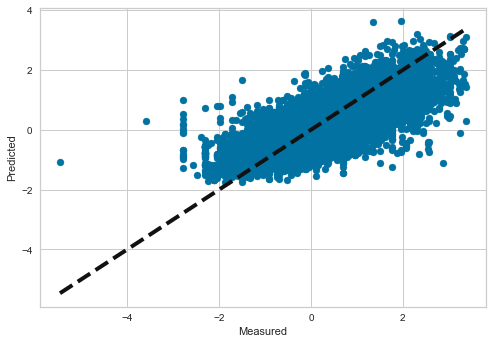

In [277]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X_train, y_train, cv=10)
fig, ax = plt.subplots()
ax.scatter(y_train, predicted)
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

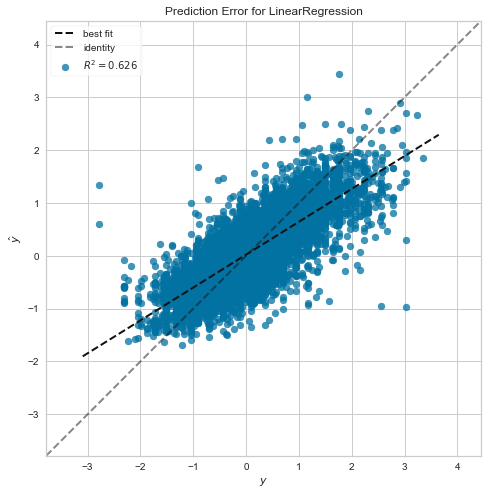

In [278]:

from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


# Instantiate the linear model and visualizer
visualizer = PredictionError(linreg)
plt.figure(figsize=(10,8))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="img/errors_linear.png")          

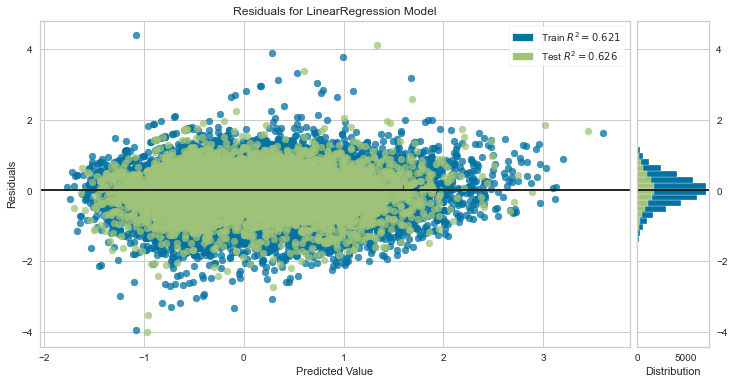

In [280]:
from yellowbrick.regressor import ResidualsPlot
plt.figure(figsize=(12,6))
visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="img/residual_linear.png")
#fig.savefig('img/residual_linear.png',  transparent=True, api=100)


### RidgeCV

In [282]:
#linear_reg_error = metrics.median_absolute_error(test2, linear_reg.predict(test1))

# ridge model testing
ridgeCV=RidgeCV()
ridgeCV.fit(X_train, y_train)
#ridge_error = metrics.median_absolute_error(test2, ridge.predict(test1))
#print ("Linear Regression: " + str(linear_reg_error))
#print ("Ridge: " + str(ridge_error))
y_pred_ridgeCV = ridgeCV.predict(X_test)
print("R-Square Value",r2_score(y_test,y_pred_ridgeCV))
print("\n")
print ("mean_absolute_error :",mean_absolute_error(y_test, y_pred_ridgeCV))
print("\n")
print ("mean_squared_error : ",mean_squared_error(y_test, y_pred_ridgeCV))
print("\n")
print ("root_mean_squared_error : ",mean_squared_error(y_test, y_pred_ridgeCV))

R-Square Value 0.6256597818814569


mean_absolute_error : 0.36238303864208216


mean_squared_error :  0.22734761873406648


root_mean_squared_error :  0.22734761873406648


In [283]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(ridgeCV, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.62227797, 0.61429739, 0.62789201, 0.61313693, 0.6270445 ,
       0.64249246, 0.61479285, 0.60397409, 0.63137276, 0.6009342 ])

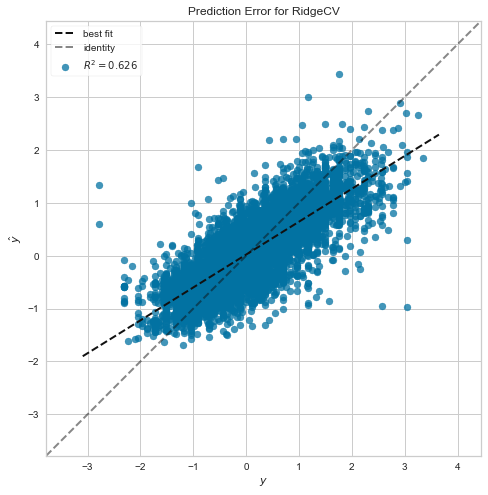

In [284]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


# Instantiate the linear model and visualizer
visualizer = PredictionError(ridgeCV)
plt.figure(figsize=(10,8))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="img/errors_ridge.png")  

In [104]:
print('alpha : ',ridgeCV.alpha_,'\nscore : ',ridgeCV.score(X_train, y_train))

alpha :  1.0 
score :  0.6976190966685027


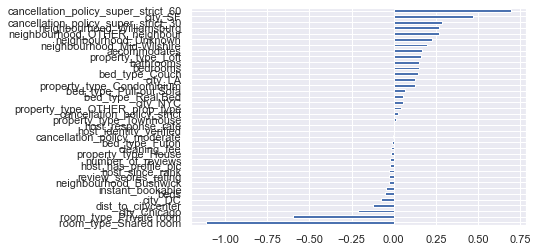

In [328]:
pd.Series(ridgeCV.coef_, index=X_train.columns).sort_values().plot.barh()

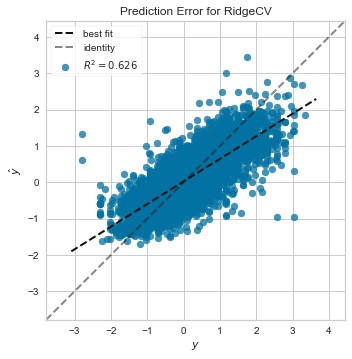

In [285]:
visualizer = PredictionError(ridgeCV)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

In [106]:
### Taking a closer look at the estimates
est = OLS(y_train, add_constant(X_train)).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     3162.
Date:                Thu, 14 Jan 2021   Prob (F-statistic):               0.00
Time:                        12:27:59   Log-Likelihood:                -26563.
No. Observations:               46633   AIC:                         5.320e+04
Df Residuals:                   46598   BIC:                         5.350e+04
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

### Decision Tree

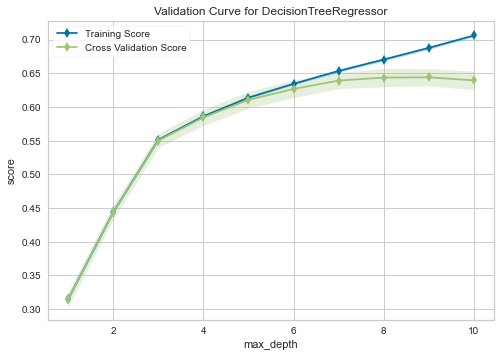

In [286]:
from yellowbrick.datasets import load_energy
from yellowbrick.model_selection import ValidationCurve

from sklearn.tree import DecisionTreeRegressor


viz = ValidationCurve(
    DecisionTreeRegressor(), param_name="max_depth",
    param_range=np.arange(1, 11), cv=10, scoring="r2"
)

# Fit and show the visualizer
viz.fit(X_train, y_train)
viz.show()

In [397]:
X_airbnb.shape

(58292, 34)

In [406]:
import os
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [287]:
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
from graphviz import Source

#limiting the maximum tree depth to 6
tree_reg_vis=DecisionTreeRegressor(max_depth=6)
#refitting the train set
tree_reg_vis.fit(X_train,y_train)
#export_graphviz(tree_reg, out_file = "d1.dot",impurity =False, filled=True)
#outfile = tree.export_graphviz(tree_reg_vis, out_file = 'tree.dot',feature_names=X_airbnb.columns)
graph = Source( tree.export_graphviz(tree_reg_vis, out_file=None, feature_names=X_airbnb.columns))
graph.format = 'png'
graph.render('dtree_render',view=True)

#from subprocess import call
#converting the dot file to png image file
#call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
# Display in jupyter notebook
#from IPython.display import Image
#Image(filename = 'tree.png')

'dtree_render.png'

In [145]:
folds = KFold(n_splits = 10, shuffle = True, random_state = 100)
scores = cross_val_score(tree_reg_vis, X_train, y_train, scoring='r2', cv=folds)
scores

array([0.67140036, 0.66522926, 0.68679976, 0.6735507 , 0.67439373,
       0.702249  , 0.66880023, 0.6726732 , 0.69655559, 0.67493417])

In [270]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError


# Instantiate the linear model and visualizer
visualizer = PredictionError(tree_reg_vis)
plt.figure(figsize=(10,8))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="img/errors_dtree.png")  

NameError: name 'tree_reg_vis' is not defined

### Random Forest

R sequared =  0.6846250279526183


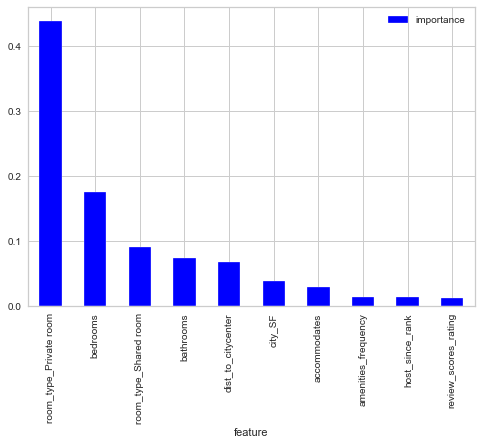

In [288]:
#Create a random forest Regressor
rfg_model = RandomForestRegressor(max_depth=10, n_estimators=100, random_state=42)

# Fit the model on training data
rfg_model.fit(X_train, y_train)
        
# Predict results
y_pred_rf = rfg_model.predict(X_test) 

# Evaluate the result
rsquared_score = r2_score(y_test, y_pred_rf)
print('R sequared = ', rsquared_score)


#Plot variable importances for the top 10 predictors
importances = rfg_model.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})

tree_result.sort_values(by='importance',ascending=False)[:10].plot(x='feature', y='importance', kind='bar',color='blue')



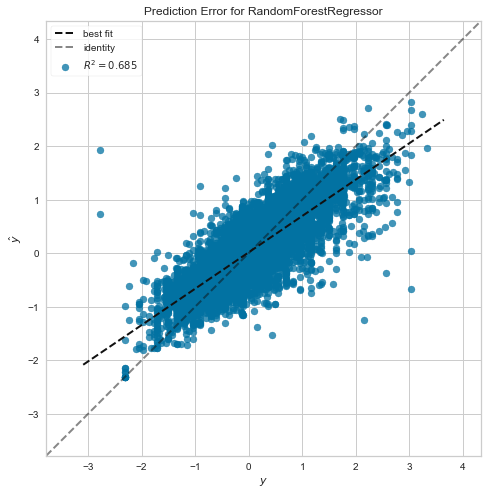

In [289]:
# Instantiate the linear model and visualizer
visualizer = PredictionError(rfg_model)
plt.figure(figsize=(10,8))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="img/errors_rfg.png")  

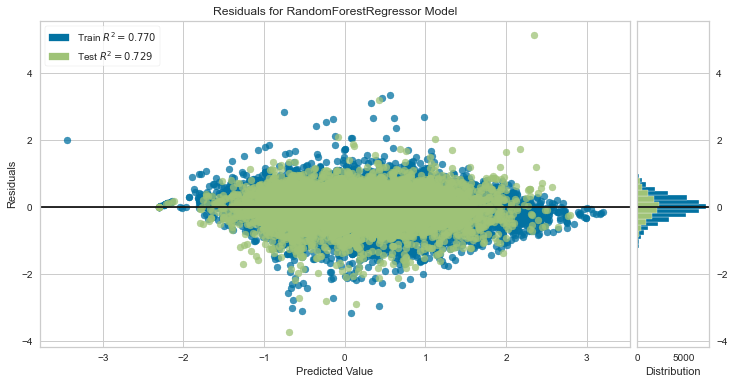

In [158]:
plt.figure(figsize=(12,6))
visualizer = ResidualsPlot(rfg_model)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="img/residual_rfg_model.png")

In [153]:
sorted(zip(X_train.columns, rfg_model.feature_importances_), key=lambda x: x[1] * 1)

[('cancellation_policy_super_strict_30', 6.406514854567091e-05),
 ('bed_type_Futon', 7.422862598028968e-05),
 ('bed_type_Pull-out Sofa', 0.00011211895724458625),
 ('host_has_profile_pic', 0.00017914144824719987),
 ('bed_type_Couch', 0.00018242885773344947),
 ('cancellation_policy_super_strict_60', 0.00022538276115184318),
 ('bed_type_Real Bed', 0.00028316384080535444),
 ('cancellation_policy_moderate', 0.00037186921339371837),
 ('property_type_Townhouse', 0.0003753922342164385),
 ('host_identity_verified', 0.0006304015231508069),
 ('cancellation_policy_strict', 0.0006931920596797009),
 ('property_type_Loft', 0.0007034471444324154),
 ('property_type_OTHER_prop_type', 0.0007213915822976051),
 ('cleaning_fee', 0.0008459770944378198),
 ('city_DC', 0.0009784774755928378),
 ('property_type_House', 0.0010385717403846764),
 ('city_SF', 0.0010974878869320082),
 ('property_type_Condominium', 0.0011674862574268734),
 ('instant_bookable', 0.0011683086902635664),
 ('city_LA', 0.0015452902097146436)

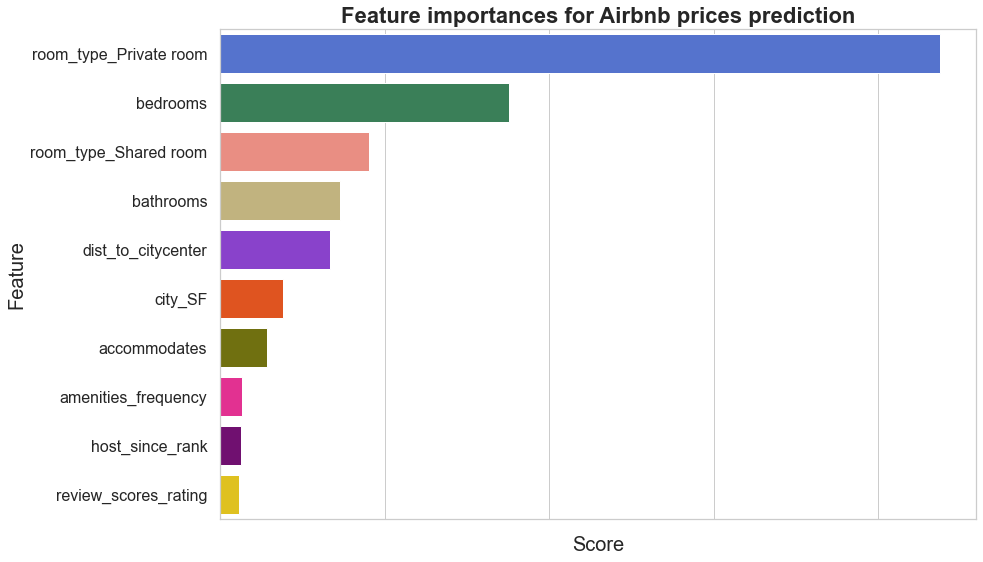

In [291]:
def feature_plot(importances, X_train, y_train):
    
    headers = ["feature", "score"]
    values = sorted(zip(X_train.columns, rfg_model.feature_importances_), key=lambda x: x[1] * 1)
    feature_importances = pd.DataFrame(values, columns = headers)
    feature_importances = feature_importances.sort_values(by = ['score'], ascending = False)

    features = feature_importances['feature'][:10]
    y_pos = np.arange(len(features))
    scores = feature_importances['score'][:10]

    #plot feature importances
    fig = plt.figure(figsize=(15,10))
    sns.set_theme()
    sns.set_style("whitegrid")
    sns.color_palette("bright")


    ax1 = sns.barplot( y = features, x = scores, palette=my_colors )
    
    ax1.set_title('Feature importances for Airbnb prices prediction',size=22, weight='bold')
    #ax1.set(xlabel='Score', ylabel='Features')
    ax1.set_xlabel("Score",fontsize=20)
    ax1.set_ylabel("Feature",fontsize=20)

    ax1.set_xticklabels(ax1.get_xmajorticklabels(), fontsize = 18)
    ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize = 18)
    #plt.xticks(rotation = 90)
    ax1.set_yticklabels(ax1.get_ymajorticklabels(), fontsize = 16)
    plt.subplots_adjust(left=0.2, bottom=0.2)

    fig.savefig('img/features_score_2.png')

importances = rfg_model.feature_importances_
feature_plot(importances, X_train, y_train)


In [ ]:
import math
print(math.sqrt(mean_squared_error(y_test, y_pred2)))

### Gradient Boosting Regressor

In [300]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
model = GradientBoostingRegressor()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1, error_score='raise')

In [113]:
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: -0.305 (0.005)


In [295]:
#Gradient Boosting Regressor
GBoost = GradientBoostingRegressor()
GBoost.fit(X_train,y_train)

y_pred_gboost=GBoost.predict(X_test)

from sklearn.metrics import r2_score
print("R2 score: ",r2_score(y_test,y_pred_gboost)*100)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred_gboost)))

#Error
error_diff = pd.DataFrame({'Actual Values': np.array(y_test).flatten(), 'Predicted Values': y_pred_gboost.flatten()})
print(error_diff.head(5))

#Visualize the error
df1 = error_diff.head(25)
df1.plot(kind='bar',figsize=(10,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

NameError: name 'GradientBoostingRegressor' is not defined

In [159]:
mean_squared_error(y_test,y_pred_gboost)

0.1639517215192438

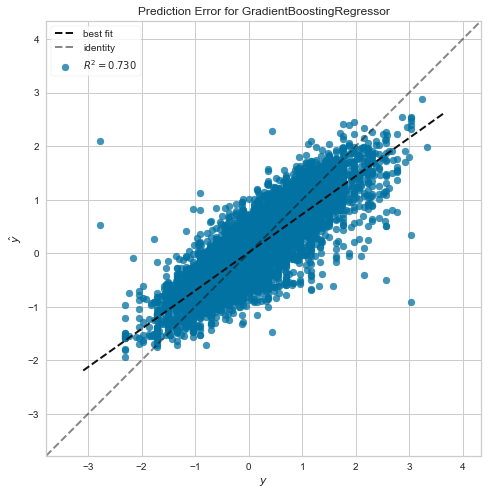

In [156]:
# Instantiate the linear model and visualizer
visualizer = PredictionError(GBoost)
plt.figure(figsize=(10,8))
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show(outpath="img/errors_GBoost.png")  

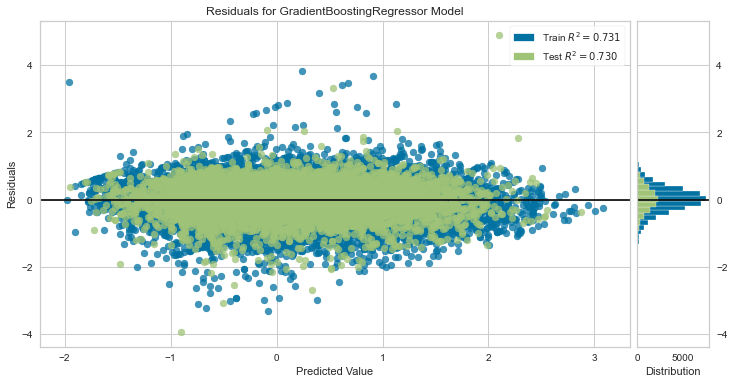

In [157]:
plt.figure(figsize=(12,6))
visualizer = ResidualsPlot(GBoost)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show(outpath="img/residual_lgboost.png")

### PCA
Let’s see if we can reduce the error using dimensionality reduction with Principal Components Analysis.

In [388]:
pca = PCA(n_components=32, random_state=1024);
pca.fit(X_airbnb)

listings_pca = pca.transform(X_airbnb)
X_train, X_test, y_train, y_test = train_test_split(listings_pca, y_airbnb, test_size=0.33, random_state=1024)

rf_classifier_pca = RandomForestRegressor(n_estimators=100, criterion='mse', random_state=1024)
rf_classifier_pca.fit(X_train, y_train)

y_p_pred = rf_classifier_pca.predict(X_test)
y_p_pred_tr = rf_classifier_pca.predict(X_train)

In [389]:

print(math.sqrt(mean_squared_error(y_test, y_p_pred)))
print(math.sqrt(mean_squared_error(y_train, y_p_pred_tr)))

0.04702359337541591
0.017520371801961823


In [157]:
principal_weights = pd.DataFrame(pca.components_,columns=X_airbnb.columns)
p_c_1 = principal_weights.iloc[0]
print(p_c_1.sort_values()[0:10])
print(p_c_1.sort_values()[-10:])

city_NYC                              -0.670872
room_type_Private room                -0.179453
cancellation_policy_moderate          -0.024193
host_since_rank                       -0.005739
bed_type_Futon                        -0.003589
bed_type_Pull-out Sofa                -0.002769
property_type_Loft                    -0.002274
property_type_Townhouse               -0.000071
cancellation_policy_super_strict_60    0.000212
cancellation_policy_super_strict_30    0.000438
Name: 0, dtype: float64
instant_bookable              0.037904
city_SF                       0.045439
accommodates                  0.057558
cancellation_policy_strict    0.107036
host_identity_verified        0.123293
dist_to_citycenter            0.141342
cleaning_fee                  0.142603
host_response_rate            0.161545
property_type_House           0.301473
city_LA                       0.566253
Name: 0, dtype: float64


## KFold

*KFold compared Linear Regression model with 10 different split sampling*

In [298]:
kfold = KFold(n_splits=10,random_state=56,shuffle=True)
average = 0
average1 = 0
for train_idx, test_idx in kfold.split(X_airbnb,y_airbnb):    
    X_train, X_CV = X_airbnb[train_idx], X_airbnb[test_idx]
    y_train, y_CV = y_airbnb[train_idx], y_airbnb[test_idx]
    
    lr = LinearRegression()
    lr.fit(X_train, y_train)
        
    pred_CV = lr.predict(X_CV)
    MSE = mse(y_CV, pred_CV)
    average = average + MSE

    score = lr.score(X_CV, y_CV)
    average1 = average1 + score
    
    print('R square score = ',score)
    print('MSE = ',MSE)

MSE_AVG = average/10
Rscore_AVG = average1/10
print('*---------------------------*')
print('Average Rscore = ', Rscore_AVG)
print('Average MSE = ',MSE_AVG)

KeyError: "None of [Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,    10,\n               11,\n            ...\n            58280, 58281, 58282, 58285, 58286, 58287, 58288, 58289, 58290,\n            58291],\n           dtype='int64', length=46633)] are in the [columns]"

*I used KFold to compare different models*

In [301]:
X = X_train
Y = y_train
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LinearRegression()))
#models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RFS', RandomForestRegressor()))
models.append(('RGCV', ridgeCV))
models.append(('GRB', GradientBoostingRegressor()))
# evaluate each model in turn
results = []
names = []
scoring = 'r2'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

LR: 0.619812 (0.008420)
DT: 0.383043 (0.012596)
RFS: 0.691057 (0.010896)
RGCV: 0.619807 (0.008426)
GRB: 0.674796 (0.010316)


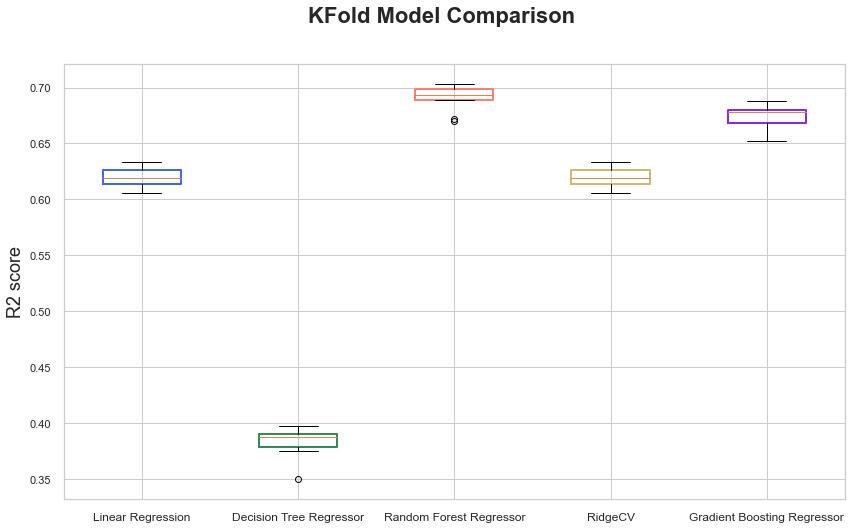

In [317]:
# boxplot algorithm comparison
names = ["Linear Regression","Decision Tree Regressor","Random Forest Regressor","RidgeCV","Gradient Boosting Regressor"]
fig = plt.figure(figsize=(14,8))
fig.suptitle('KFold Model Comparison',size=22, weight='bold')
ax = fig.add_subplot(111)
bp = plt.boxplot(results)
for i, box in enumerate(bp['boxes']):
    # change outline color
    box.set(color=my_colors[i], linewidth=2)

    
ax.set_xticklabels(names, fontsize = 12)
#plt.xticks(rotation = 40)

plt.ylabel( "R2 score" , size = 18 )
plt.show()
fig.savefig('img/model_compare.png')

<b> best result is RandomForestRegressor model with metrics(Rscore) = 0.732148 </b>

## Evaluate model

#### Data Cleaning for test.csv dataset

In [404]:
missing_cols = test_df.isnull().sum(axis=0).reset_index()
missing_cols.columns = ['column_name', 'missing_count']
missing_cols = missing_cols.loc[missing_cols['missing_count']>0]
missing_cols = missing_cols.sort_values(by='missing_count',ascending=False)
missing_cols

,column_name,missing_count
14,host_response_rate,6306
23,review_scores_rating,5717
11,first_review,5436
17,last_review,5425
24,thumbnail_url,2859
21,neighbourhood,2465
25,zipcode,321
5,bathrooms,79
12,host_has_profile_pic,55
13,host_identity_verified,55


In [405]:
test_df[['host_response_rate']] = test_df['host_response_rate'].apply(lambda col: float(str(col).replace("%", "")))
test_df['host_response_rate'] = test_df['host_response_rate'].fillna(0)
test_df['host_response_rate'] = pd.to_numeric(test_df['host_response_rate'])

test_df['review_scores_rating'] = test_df['review_scores_rating'].fillna(0)

In [406]:
# 'last_review'
test_df['last_review'] = test_df['last_review'].fillna('00-00-00')
# 'first_review'
test_df['first_review'] = test_df['first_review'].fillna('00-00-00')
# 'host_since'
test_df['host_since'] = test_df['host_since'].fillna('00-00-00')

In [407]:
# 'bathrooms'
test_df['bathrooms'] = test_df['bathrooms'].fillna(0)

# 'bedrooms'
test_df['bedrooms'] = test_df['bedrooms'].fillna(0)

# 'beds' 
test_df['beds'] = test_df['beds'].fillna(0)

In [408]:
test_df.review_scores_rating.fillna(0,inplace=True)

In [409]:
# 'host_has_profile_pic'
test_df.loc[test_df.host_has_profile_pic == 't', 'host_has_profile_pic'] = 1
test_df.loc[test_df.host_has_profile_pic == 'f', 'host_has_profile_pic'] = 0
test_df['host_has_profile_pic'] = test_df['host_has_profile_pic'].fillna(0)

In [410]:
# 'host_identity_verified'
airbnb.loc[airbnb.host_identity_verified == 't', 'host_identity_verified'] = 1
airbnb.loc[airbnb.host_identity_verified == 'f', 'host_identity_verified'] = 0
airbnb['host_identity_verified'] = airbnb['host_identity_verified'].fillna(0)
test_df.loc[test_df.host_identity_verified == 't', 'host_identity_verified'] = 1
test_df.loc[test_df.host_identity_verified == 'f', 'host_identity_verified'] = 0
test_df['host_identity_verified'] = test_df['host_identity_verified'].fillna(0)

In [411]:
# 'neighbourhood'
test_df.neighbourhood.fillna('Unknown',inplace=True)
# 'thumbnai_url'
test_df.thumbnail_url.fillna('Unknown',inplace=True)

In [412]:
# 'zipcode' 
test_df.zipcode.fillna('Unknown',inplace=True)
test_df.loc[test_df.zipcode == ' ', 'zipcode'] = 0
idx = test_df.index[test_df['zipcode']==0].tolist()
for i in idx:
    lat = test_df['latitude'][i]
    lon = test_df['longitude'][i]
    result = np.max(search.by_coordinates(lat, lon, radius=30, returns=5))
    test_df['zipcode'][i]=result.values()[0]

In [413]:
test_df.city.unique()
# Define a function to map the values 
def set_value(row_number, assigned_value): 
    return assigned_value[row_number] 
test_df['lat_citycenter'] = test_df['city'].apply(set_value, args =(lat_dict, )) 
test_df['long_citycenter'] = test_df['city'].apply(set_value, args =(log_dict, )) 


test_df['dist_to_citycenter'] = test_df.apply(lambda row: haversine(row['longitude'], row['latitude'], row['long_citycenter'], row['lat_citycenter']), axis=1)
test_df['dist_to_citycenter'] 

0        32.391949
1         7.326865
2        22.630476
3        25.983787
4         5.579032
           ...    
25453    27.966727
25454    40.809534
25455    33.762386
25456     2.482953
25457    10.635372
Name: dist_to_citycenter, Length: 25458, dtype: float64

In [414]:
((test_df.review_scores_rating==0) & (test_df.number_of_reviews==0) & (test_df.host_response_rate==0)).sum()
test_df = test_df.drop(test_df[(test_df.review_scores_rating==0) & (test_df.number_of_reviews==0) & (test_df.host_response_rate==0)].index)


In [415]:
test_df.drop(['id', 'name', 'description', 'thumbnail_url', 'latitude',
              'longitude','zipcode','lat_citycenter', 'long_citycenter',
             'first_review', 'last_review'], axis = 1, inplace=True)

#### Data preprocessing for test.csv dataset

In [416]:
test_df.loc[test_df.instant_bookable == 't', 'instant_bookable'] = 1
test_df.loc[test_df.instant_bookable == 'f', 'instant_bookable'] = 0

In [417]:
test_df['host_since_rank'] = test_df['host_since'].rank(method='dense').astype(int)

In [418]:
test_df.drop(['host_since'], axis = 1, inplace=True)

In [419]:
dummies = test_df["amenities"].map(lambda x: get_arr(x)).str.get_dummies(",") 
amenities_dummies = dummies[['Wireless Internet','Kitchen','Heating','Essentials']]
test_df.drop(['amenities'], axis = 1, inplace=True)

In [420]:
test_df.cleaning_fee = test_df.cleaning_fee.astype(int)
test_df.instant_bookable = test_df.instant_bookable.astype(int)

In [421]:
test_df.neighbourhood = np.where(test_df.neighbourhood.isin(neighbour_keep),test_df.neighbourhood,'OTHER_neighbour')
test_df.property_type = np.where(test_df.property_type.isin(proptypey_remove),'OTHER_prop_type',test_df.property_type)

In [422]:
test_df.neighbourhood.unique()

array(['OTHER_neighbour', 'Williamsburg', 'Unknown', 'Bushwick',
       'Mid-Wilshire', 'Bedford-Stuyvesant'], dtype=object)

In [423]:
test_df_dummy = pd.get_dummies(data=test_df, drop_first=True, columns=categorical_attributes)

pd.concat([test_df_dummy, amenities_dummies], axis=1, ignore_index=True)
test_df_dummy

,accommodates,bathrooms,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,number_of_reviews,review_scores_rating,bedrooms,...,city_Chicago,city_DC,city_LA,city_NYC,city_SF,neighbourhood_Bushwick,neighbourhood_Mid-Wilshire,neighbourhood_OTHER_neighbour,neighbourhood_Unknown,neighbourhood_Williamsburg
0,2,1.0,1,1,0,100.0,0,6,97.0,1.0,...,0,0,1,0,0,0,0,1,0,0
1,3,1.0,1,1,1,100.0,0,2,80.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1,1.0,1,1,1,100.0,0,2,100.0,1.0,...,0,0,0,0,1,0,0,1,0,0
3,1,1.0,1,1,1,100.0,0,7,94.0,0.0,...,0,0,1,0,0,0,0,1,0,0
5,3,2.0,1,1,1,100.0,0,8,98.0,1.0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25451,5,1.0,1,1,1,100.0,0,4,95.0,2.0,...,0,0,0,0,1,0,0,1,0,0
25452,2,1.0,0,1,1,96.0,0,0,0.0,1.0,...,0,1,0,0,0,0,0,0,1,0
25453,6,2.0,1,1,1,100.0,0,8,90.0,3.0,...,0,0,0,0,1,0,0,1,0,0
25455,2,1.0,1,1,1,100.0,0,11,95.0,1.0,...,0,0,1,0,0,0,0,1,0,0


In [424]:
scaler = StandardScaler()
test_df_dummy[['host_since_rank','dist_to_citycenter','review_scores_rating','host_response_rate',
              'number_of_reviews']] =scaler.fit_transform(test_df_dummy[['host_since_rank','dist_to_citycenter',
                                                                        'review_scores_rating','host_response_rate','number_of_reviews']])

test_df_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,22452.0,3.214190e+00,2.151234,1.000000,2.000000,2.000000,4.000000,16.000000
bathrooms,22452.0,1.239555e+00,0.602332,0.000000,1.000000,1.000000,1.000000,15.500000
cleaning_fee,22452.0,7.762783e-01,0.416747,0.000000,1.000000,1.000000,1.000000,1.000000
host_has_profile_pic,22452.0,9.960360e-01,0.062837,0.000000,1.000000,1.000000,1.000000,1.000000
host_identity_verified,22452.0,7.054605e-01,0.455846,0.000000,0.000000,1.000000,1.000000,1.000000
host_response_rate,22452.0,-6.122644e-16,1.000022,-2.194283,0.232144,0.532040,0.532040,0.532040
instant_bookable,22452.0,2.785053e-01,0.448273,0.000000,0.000000,0.000000,1.000000,1.000000
number_of_reviews,22452.0,-2.835836e-16,1.000022,-0.587671,-0.537923,-0.388681,0.083918,11.575549
review_scores_rating,22452.0,3.955404e-17,1.000022,-2.621445,0.169351,0.391346,0.549914,0.549914
bedrooms,22452.0,1.271824e+00,0.852073,0.000000,1.000000,1.000000,1.000000,14.000000


In [425]:
scaler = RobustScaler()
test_df_dummy[['accommodates','bathrooms','bedrooms', 
              'beds']] = scaler.fit_transform(test_df_dummy[['accommodates','bathrooms','bedrooms','beds']])

test_df_dummy.describe().T

,count,mean,std,min,25%,50%,75%,max
accommodates,22452.0,6.070951e-01,1.075617,-0.500000,0.000000,0.000000,1.000000,7.000000
bathrooms,22452.0,2.395555e-01,0.602332,-1.000000,0.000000,0.000000,0.000000,14.500000
cleaning_fee,22452.0,7.762783e-01,0.416747,0.000000,1.000000,1.000000,1.000000,1.000000
host_has_profile_pic,22452.0,9.960360e-01,0.062837,0.000000,1.000000,1.000000,1.000000,1.000000
host_identity_verified,22452.0,7.054605e-01,0.455846,0.000000,0.000000,1.000000,1.000000,1.000000
host_response_rate,22452.0,-6.122644e-16,1.000022,-2.194283,0.232144,0.532040,0.532040,0.532040
instant_bookable,22452.0,2.785053e-01,0.448273,0.000000,0.000000,0.000000,1.000000,1.000000
number_of_reviews,22452.0,-2.835836e-16,1.000022,-0.587671,-0.537923,-0.388681,0.083918,11.575549
review_scores_rating,22452.0,3.955404e-17,1.000022,-2.621445,0.169351,0.391346,0.549914,0.549914
bedrooms,22452.0,2.718243e-01,0.852073,-1.000000,0.000000,0.000000,0.000000,13.000000


In [426]:
X_test_eval = test_df_dummy

In [428]:
X_test_eval.shape

(22452, 38)

In [429]:
X_test.shape

(13043, 38)

#### predict y for test_df

In [430]:
preds=linreg.predict(X_test_eval)

In [433]:
preds.shape

(22452,)

In [434]:
y_pred.shape

(13043,)

In [438]:
submission=pd.DataFrame({'predictions':preds})

In [439]:
submission

,predictions
0,4.173090
1,5.067220
2,4.600002
3,4.685183
4,4.399583
...,...
22447,5.617869
22448,4.943139
22449,5.894095
22450,4.749936


In [ ]:
submission.to_csv('data/sample_submission.csv')

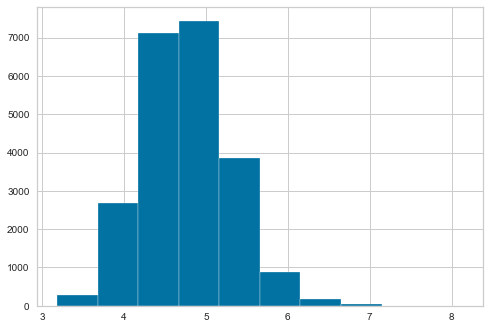

In [440]:
submission.predictions.hist()